In [1]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

## Read simulation input from a file

It is often useful to read simulation inputs from a file. Let's do this for our standard tank system.

<img src="../../assets/tanksystem.png">

\begin{align}
F_{out} &= kh\\
\frac{\mathrm{d}h}{\mathrm{d}t} &= \frac{1}{A}\left(F_{in} - F_{out}\right)\\
\end{align}

First we define the parameters of the system

In [2]:
K = 1
A = 1

Then, we'll read the values of $F_{in}$ from an Excel file using `pandas.read_excel`.

In [3]:
import pandas

In [4]:
df = pandas.read_excel('../../assets/tankdata.xlsx')
df

,Time,Fin
0,0,1.0
1,5,2.0
2,10,2.0
3,15,1.5
4,20,1.0
5,25,2.0
6,30,2.0


We'll set this function up to interpolate on the above table for the value of $F_in$ given a known time.

In [5]:
def Fin(t):
    return numpy.interp(t, df.Time, df.Fin)

We can test for one value at a time

In [6]:
Fin(1)

1.2

`interp` also accepts vector inputs:

In [7]:
tspan = (0, 30)
t = numpy.linspace(*tspan)

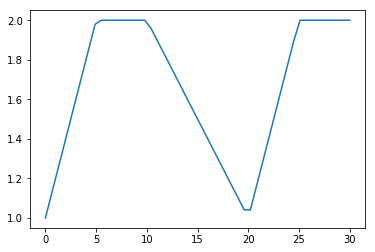

In [8]:
plt.plot(t, Fin(t))

Now we're ready to define our differential equation function:

In [9]:
def dhdt(t, h):
    Fout = K*h
    return 1/A*(Fin(t) - Fout)

In [10]:
h0 = 1

In [11]:
import scipy.integrate

In [12]:
sol = scipy.integrate.solve_ivp(dhdt, tspan, [h0], t_eval=t)

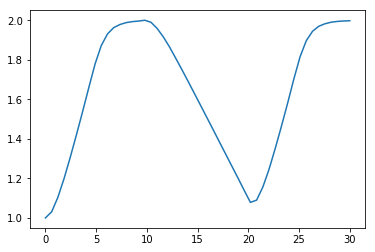

In [13]:
plt.plot(sol.t, sol.y.T)